# Tone Classifier - CNN vs Fox News

### About the project

As per Pew Research Center, there are certain news outlets that are favorites amongst conservatives and liberals [1]. In this project, I aim to categorise **whether there exists a certian tone or sentiment** in the videos posted by these news outlets that make it a constant source of information for certain types of viewers. 

### Research Questions

* Does there exist a certain tone or sentiment in the videos, which make it easily differentiable from other news outlets?
* Based on above tone, can we build a supervised classifer model to distinguish content between CNN and Fox News?
* What are the most common terms or words used in each of the news outlets and the associated sentiments?
* Is there a common sentiment (positive, nnegative, neutral) for each of these channel outlets?

### Dataset Description

For this project, we generate our own dataset using the `YouTubeDataApi` where we extract 4000 videos from the most (`Fox News`) and least conservative channels (`CNN`) as per the Pew Research [1]. Following this, we download the transcript for all these videos (total 8000) using the `YouTubeTranscriptAPi`. The data contains 4000 videos from each of the channels and I believe that collecting this data directly from YouTube would help us accurately describe the common terms and sentiments as this news is presented on their channels. This also helps us download transcripts to define an underlying tone. The collected fields are described below: 

#### Data Glossary (collected data)

1. `channel_name` - The name of the channel that the video was posted by, which may be an individual contributor or a group
2. `video_id` - Unique identifier of the video in YouTube
3. `video_title` - Title of the posted video
4. `video_description` - Description of the posted video
5. `video_published_at` - Time of the posting of video
6. `video_view_count` - The number of views that the video received, at the itme of collection
7. `video_like_count` - The number of likes that the video received, at the time of collection
8. `video_comment_count` - The number of comments that the video received, at the time of collection
9. `transcript` - The transcript of the entire video, pulled using the `video_id`
11. `transcript_vader` - The polarity score of the transcript after applying `Vader` sentiment analyzer
12. `vader_category` - The category calculated from the vader score, where 

### Suitability of algorithms

* `AutoKeras` - The input type for this algorithm is very flexible, and the algorithm is super flexible with an easy to use interface for the task, backed by the power of TensorFlow [2].
* `SVC` - We use this to compare with `AutoKeras`, as well as it's effectiveness in high-dimensional spaces which exist when we convert the transcript data into numerical using the `TfidfVectorizer` and because based on the above classifier, there exists a clear seperation between the two channels. We also notice that the number of dimensions are more than the number of samples which makes it a suitable data for `SVC`[3].

### Approach

This is being approached as a **binary** classification problem, where we input the `transcript` as the predictor (X) and we aim to predict the `channel_name` as the outcome (Y). We will apply various algorithms like AutoKeras (built on top of Tensorflow) and Support Vector Classifier (SVC) for this task and compare the performance of these algorithms. 

The chronological approach is as below - 

1. Importing Required Libraries
2. Downloading the metrics and video information for each of the channels (`CNN`, `Fox News`)
3. Downloading the transcript of each of the videos
4. Exploratory Data Analysis for the downloaded data
5. Data Cleaning
6. Applying the `Vader` sentiment analyser on the transcripts to understand the common tone of these channels
7. Applying the `AutoKeras` and `SVC` classifiers on the transcript data to predict the channel and printng the results
8. Visualizing the results

### Challenges

* The `YouTubeDataAPI` only allows 10000 requests per day, and this limits the amount of data that we could collect and while the f-1 scores we have received are satisfactory, it would be interesting to note if the f-1 score changes in any way due to the dataset size
* Transcripts are not available for a lot of videos for the channel `CNN` which causes a class imbalance. While this does impact the accuracy in some way, we use the f-1 score as an alternative measure to accuracy but the class imbalance cannot be completely ignored however because there is an external dependency in downloading the transcripts, there is not much that we can do in that regards. A solution is to undersample the `Fox News` videos to account for the imbalance but that would lead to loss of critical information hence that is not done in the below code. 
* The code - especially the transcript download - takes a long time which limits our ability to increase the size of the dataset exponentially without causing unreasonable run times for the code.

### How does machine learning solve the problem?

* In the below classifier, we have used different ML algorithms to determine a common tone, sentiment or set of words across different video transcripts to determine whether the video may have been posted by CNN or Fox News. By doing so, we are able to prove that there is a common and identifiable trend between the content of videos posted by these channels, and identifying this gives us the ability to classify the transcript to the given channel, with an accuracy of **>90%**
* While the problem was limited to `CNN` and `Fox News`, the objective of this research goes deeoper into how certain news outlets employ certain techniques including a distinguishable tone and language to keep their viewers hooked, while presenting the same content as some of it's counterparts. This helps us in understanding how the same message can be delivered in different methods and can attract different set of audiences.
* As a society, it also helps to know about these distingushable trends and in understanding which news agencies are using emotions (positive,negative) in their reporting to attract viewers to present a subject (news (world affairs)) which should ideally be neutral, but as defined is not.

#### Risks

* Currently the model has only been trained on less than 4000 videos per channel, and only for two channels. Hence, to accurately use and represent trends in the real world, we'd require the model to be trained on more volume and diversity of data.
* Some of these trends may be subject to confidentiality and may be subject to approval by the owners of thsi content (news agencies) for larger scale analysis
* If the model does not perform well, it will falsely classify a video to a different channel and if expanded to other news agencies, it may reduce the reliability of the reporting being falsely classified as news from a lower-reputed outlet.

#### Advantages
* Greater understanding of how news agencies employ techniques of introducing polarity in their reporting to attract viewership
* An ability to expand to be able to identify a piece of content or video and map it to the reliability based on it's news channel classification. Example - CNN in our research was found to be more neutral so it's reliability could be considered more than Fox, which may be polarising it's content.


### Future Work
* Expanding this analysis to more news channels on both ends of the spectrum, and finding ways to avoid the class imbalance that we encountered earlier.
* By doing above, we will make this into a multivariate classification problem which will be more difficult to train and evaluate


References - 

1. https://www.pewresearch.org/journalism/2014/10/21/section-1-media-sources-distinct-favorites-emerge-on-the-left-and-right/
2. https://autokeras.com/tutorial/text_classification/#
3. https://towardsdatascience.com/everything-about-svm-classification-above-and-beyond-cc665bfd993e


### Importing Required Libraries

In [2]:
# Importing Required Libraries and necessary setup
!pip install --upgrade google-api-python-client youtube-transcript-api autokeras --quiet
!pip install vaderSentiment --quiet
!pip install empath --quiet

import json
import googleapiclient
import pandas as pd
import datetime
import googleapiclient.discovery
from youtube_transcript_api import YouTubeTranscriptApi
import requests
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from autokeras import TextRegressor
import string
import seaborn as sns
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
import empath

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


Using TensorFlow backend


[nltk_data] Downloading package punkt to /Users/mahirjain/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahirjain/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mahirjain/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#API_KEY = <INSERT_API_KEY> # If new data has to be downloaded

In [3]:
# youtube = googleapiclient.discovery.build("youtube", "v3", developerKey=API_KEY)

### Transcript & Videos Download

In [4]:
# Video & Metrics collection from YouTube

def download_statistics(username, limit=10, api_key=None):

    # request = youtube.channels().list(
    # part="contentDetails",
    # forUsername=username
    # )

    request = youtube.channels().list(
    part="contentDetails",
    id=username
    )

    res = request.execute()
    uploads_playlist_id = res["items"][0]["contentDetails"]["relatedPlaylists"]["uploads"]
    videos_info = []

    request = youtube.playlistItems().list(
        part="snippet",
        playlistId = uploads_playlist_id
        # YOUR SOLUTION
    )

    res = request.execute()

    page_token = res['nextPageToken'] if res['nextPageToken'] else ""
    for v in res["items"]:
        video_id = v['snippet']['resourceId']['videoId']
        # Get video views count
        stats_request = youtube.videos().list(
            part="statistics",
            id=video_id
        )
        stats_res = stats_request.execute()

        # Check if statistics are available for the video
        try:
            statistics = stats_res['items'][0]['statistics']
            #print(statistics)
            view_count = int(statistics['viewCount'])
            like_count = int(statistics['likeCount'])
            comment_count = int(statistics['commentCount'])
        except Exception as e:
            view_count = like_count = comment_count = 0

        dict_vid = {
            'channel_name': v['snippet']['channelTitle'],
            'channel_id': v['snippet']['channelId'],
            'video_id': video_id,
            'video_title': v['snippet']['title'],
            'video_description': v['snippet']['description'],
            'video_published_at': v['snippet']['publishedAt'],
            'video_view_count': view_count,
            'video_like_count': like_count,
            'video_comment_count': comment_count
        }
        videos_info.append(dict_vid)

    while page_token and len(videos_info) < limit: # Limiting the number of API calls using the videos_info as the daily limit is exceeding otherwise
        request = youtube.playlistItems().list(
        part="snippet",
        playlistId = uploads_playlist_id,
        pageToken = page_token
    )
        res = request.execute()
        page_token = res['nextPageToken'] if res['nextPageToken'] else ""

        for v in res["items"]:
            video_id = v['snippet']['resourceId']['videoId']

            # Get video video views count
            stats_request = youtube.videos().list(
                part="statistics",
                id=video_id
            )
            stats_res = stats_request.execute()

            # Check if statistics are available for the video
            try:
                statistics = stats_res['items'][0]['statistics']
                #print(statistics)
                view_count = int(statistics['viewCount'])
                like_count = int(statistics['likeCount'])
                comment_count = int(statistics['commentCount'])
            except Exception as e:
                view_count = like_count = comment_count = 0

            dict_vid = {
                'channel_name': v['snippet']['channelTitle'],
                'channel_id': v['snippet']['channelId'],
                'video_id': video_id,
                'video_title': v['snippet']['title'],
                'video_description': v['snippet']['description'],
                'video_published_at': v['snippet']['publishedAt'],
                'video_view_count': view_count,
                'video_like_count': like_count,
                'video_comment_count': comment_count
            }
            videos_info.append(dict_vid)
    print(f"The videos extracted from {youtube_id_1[username]} are: ", len(videos_info))
    return videos_info


#API_KEY = API_KEY

youtube_id_1 = {
     "UCupvZG-5ko_eiXAupbDfxWw" : "CNN",
     "UCXIJgqnII2ZOINSWNOGFThA": "Fox News"
}
export_data = []

# try:
#     for id in youtube_id_1.keys():
#         export_data.extend(download_statistics(id, limit=4000, api_key=API_KEY))
# except Exception as e:
#     print(e)


In [5]:
# current_datetime = datetime.datetime.now()
# transcript_data_path = f"data/transcript_data_{str(current_datetime)}.csv"
# pd.DataFrame(export_data).to_csv(transcript_data_path)

In [3]:
transcript_data = pd.read_csv('data/transcript_data_v1.csv') # Using once data has been downloaded
#transcript_data = pd.read_csv(transcript_data_path)

In [4]:
# https://stackoverflow.com/questions/18603270/progress-indicator-during-pandas-operations
# Transcript download
!pip install tqdm --quiet
from tqdm.auto import tqdm
tqdm.pandas()

# Function to get transcript for a given video_id
def get_transcript(video_id):
    try:
        transcript = YouTubeTranscriptApi.get_transcript(video_id)
        return ' '.join([entry['text'] for entry in transcript])
    except Exception as e:
        return None

# # Apply the function to create a new 'transcript' column
# transcript_data['transcript'] = transcript_data['video_id'].progress_apply(get_transcript) # lengthy operation so we want to see the progress
# transcript_data.to_csv(transcript_data_path)



In [5]:
#transcript_data.to_csv('data/transcript_data_v1.csv')

In [6]:
transcript_data = pd.read_csv('data/transcript_data_v1.csv')

### Exploratory Data Analysis

In [7]:
transcript_data = transcript_data.replace(to_replace='none', value=np.nan).dropna()

In [8]:
def clean_text(text):
    # Lowercasing
    text = str(text)
    text = text.lower()

    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation and special characters
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]

    # Removing numbers
    words = [word for word in stripped if word.isalpha()]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    return ' '.join(words)

# Applying the cleaning text function to all the text columns for analysis in our data
transcript_data[['transcript']] = transcript_data[['transcript']].apply(lambda x: x.map(clean_text))
transcript_data.isnull().sum()
transcript_data = transcript_data.dropna(subset=['transcript']) # Since this is the primary column of interest, null values are not acceptable

In [9]:
from tqdm.auto import tqdm
tqdm.pandas()

lexicon = empath.Empath()

def analyze_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    return analyzer.polarity_scores(text)['compound']

transcript_data['transcript_vader'] = transcript_data['transcript'].progress_apply(analyze_vader)


# Extract sentiment labels using the quantitative metrics
transcript_data['vader_category'] = transcript_data['transcript_vader'].apply(lambda x: 'positive' if x > 0 else 'negative' if x < 0 else 'neutral')

  0%|          | 0/6588 [00:00<?, ?it/s]

<Axes: xlabel='channel_name', ylabel='count'>

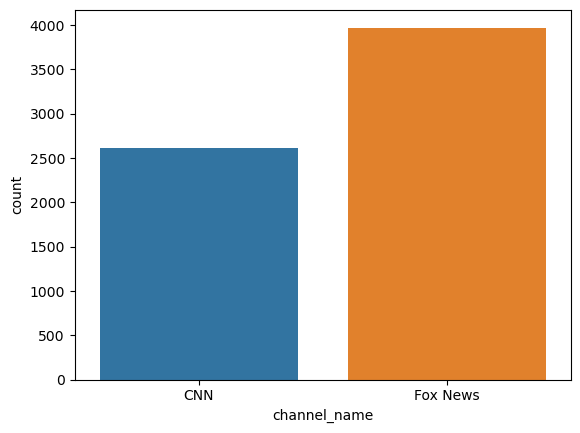

In [10]:
sns.countplot(data=transcript_data, x='channel_name')

As explained earlier, there is a class imbalance in the data, with more transcripts avaialble for Fox news hence we use the F-1 score to evaluate the performance as compared to the accuracy.

/Users/mahirjain/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


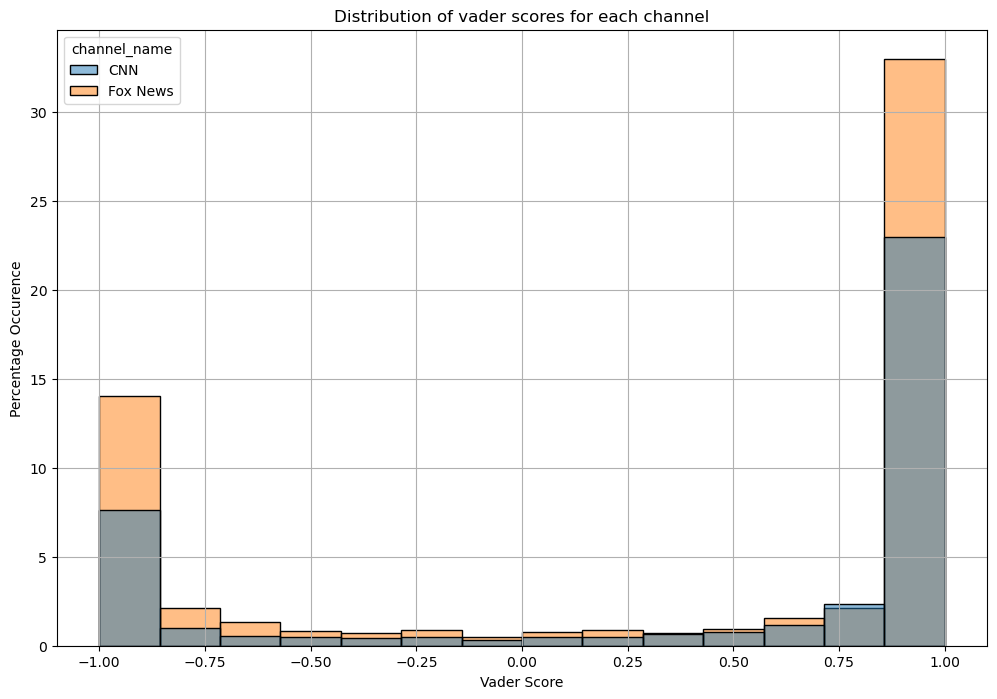

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=transcript_data, x='transcript_vader', hue='channel_name', stat = 'percent')
plt.title('Distribution of vader scores for each channel')
plt.xlabel('Vader Score')
plt.ylabel('Percentage Occurence')
plt.grid(True)
plt.show()

/Users/mahirjain/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


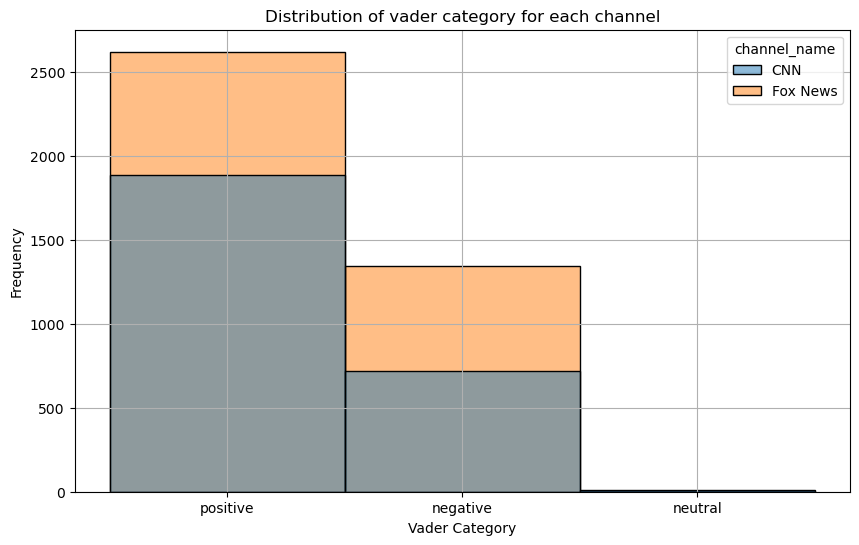

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data=transcript_data, x='vader_category', hue='channel_name')
plt.title('Distribution of vader category for each channel')
plt.xlabel('Vader Category')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Measuring the performance of various classification models

Classifying the video based on it's transcript into two channels (CNN, Fox News)

In [13]:
import tensorflow as tf
import autokeras as ak

classification_channel_data = transcript_data[['channel_name','transcript']]
# Preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenization
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return ' '.join(tokens)

# Apply preprocessing to the text column
classification_channel_data['clean_transcript'] = classification_channel_data['transcript'].apply(preprocess_text)
#virality_from_title['clean_title'] = virality_from_title['transcript'].apply(preprocess_text)


X_train, X_test, y_train, y_test = train_test_split(classification_channel_data['transcript'], classification_channel_data['channel_name'], test_size=0.2, random_state=42)

x_train = np.array(X_train)
y_train = np.array(y_train)
x_test = np.array(X_test)
y_test = np.array(y_test)

print(x_train.shape)
print(y_train.shape)

clf = ak.TextClassifier(
    overwrite=True, max_trials=1
)  
clf.fit(x_train, y_train, epochs=5)
predicted_y = clf.predict(x_test)
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 00m 24s]
val_loss: 0.1553587019443512

Best val_loss So Far: 0.1553587019443512
Total elapsed time: 00h 00m 24s
Epoch 1/5
165/165 [==============================] - 6s 32ms/step - loss: 0.4838 - accuracy: 0.7484
Epoch 2/5
165/165 [==============================] - 5s 33ms/step - loss: 0.1693 - accuracy: 0.9347
Epoch 3/5
165/165 [==============================] - 5s 33ms/step - loss: 0.0806 - accuracy: 0.9696
Epoch 4/5
165/165 [==============================] - 5s 33ms/step - loss: 0.0365 - accuracy: 0.9888
Epoch 5/5
165/165 [==============================] - 6s 35ms/step - loss: 0.0213 - accuracy: 0.9935
INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


INFO:tensorflow:Assets written to: ./text_classifier/best_model/assets


42/42 [==============================] - 0s 10ms/step


42/42 [==============================] - 0s 10ms/step - loss: 0.2279 - accuracy: 0.9385
[0.22792312502861023, 0.9385432600975037]


42/42 [==============================] - 0s 10ms/step


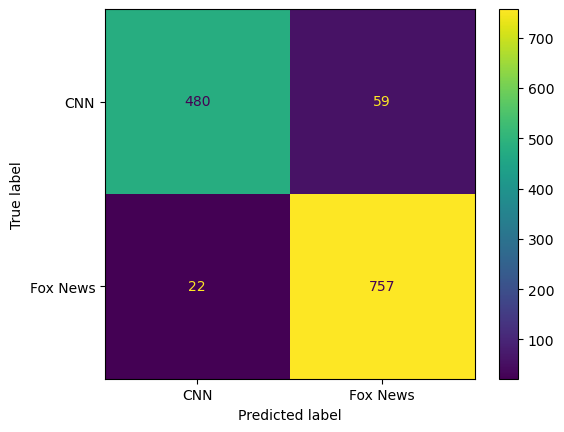

In [14]:
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = clf.predict(x_test)
cm = confusion_matrix(y_test, predictions, labels=['CNN','Fox News'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['CNN','Fox News'])
disp.plot()
plt.show()

In [15]:
from sklearn.metrics import f1_score
f1_autokeras = f1_score(y_test, predictions, pos_label = 'CNN')
print("F1 Score for AutoKeras:", f1_autokeras)

F1 Score for AutoKeras: 0.9221902017291066


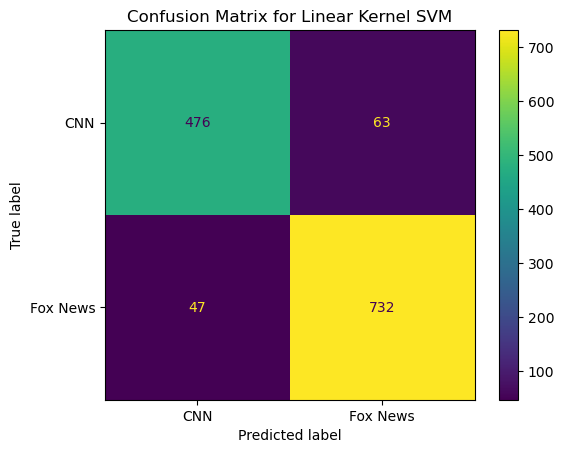

In [16]:
#https://stackoverflow.com/questions/26826002/adding-words-to-stop-words-list-in-tfidfvectorizer-in-sklearn

# Starting with Linear Kernel
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction import text

my_additional_stop_words = {'fox','cnn'} # Removing these words to remove any identification and avoid bias
stop_words = text.ENGLISH_STOP_WORDS
stop_words = stop_words.union(my_additional_stop_words)
stop_words = list(stop_words)
linear_vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.05, max_df=0.9)
X = linear_vectorizer.fit_transform(transcript_data['transcript'])


X_train, X_test, y_train, y_test = train_test_split(X, transcript_data['channel_name'], test_size=0.2, random_state=42)

classifier_linear = SVC(kernel='linear')
classifier_linear.fit(X_train, y_train)


predictions = classifier_linear.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=['CNN','Fox News'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['CNN','Fox News'])
disp.plot()
plt.title('Confusion Matrix for Linear Kernel SVM')
plt.show()

In [17]:
from sklearn.metrics import f1_score
f1_linear_svc = f1_score(y_test, predictions, pos_label = 'CNN')
print("F1 Score for SVC (linear):", f1_linear_svc)

F1 Score for SVC (linear): 0.896421845574388


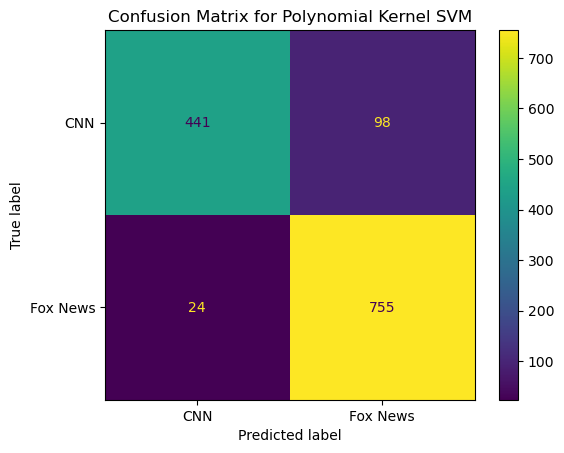

In [18]:
# Using Polynomial kernel

vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.05, max_df=0.9)
X = vectorizer.fit_transform(transcript_data['transcript'])

X_train, X_test, y_train, y_test = train_test_split(X, transcript_data['channel_name'], test_size=0.2, random_state=42)

classifier = SVC(kernel='poly')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=['CNN','Fox News'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['CNN','Fox News'])
disp.plot()
plt.title('Confusion Matrix for Polynomial Kernel SVM')
plt.show()

In [19]:
from sklearn.metrics import f1_score
f1_poly_svc = f1_score(y_test, predictions, pos_label = 'CNN')
print("F1 Score for SVC (polynomial):", f1_poly_svc)

F1 Score for SVC (polynomial): 0.8784860557768924


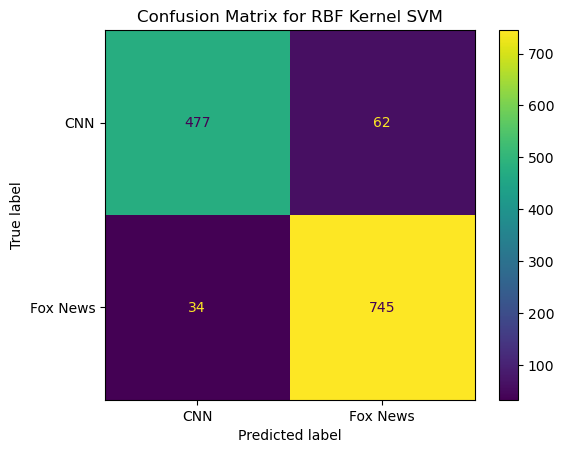

In [20]:
# Using rbf kernel

vectorizer = TfidfVectorizer(stop_words=stop_words, min_df=0.05, max_df=0.9)
X = vectorizer.fit_transform(transcript_data['transcript'])


X_train, X_test, y_train, y_test = train_test_split(X, transcript_data['channel_name'], test_size=0.2, random_state=42)

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=['CNN','Fox News'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['CNN','Fox News'])
disp.plot()
plt.title('Confusion Matrix for RBF Kernel SVM')
plt.show()

In [21]:
from sklearn.metrics import f1_score
f1_rbf_svc = f1_score(y_test, predictions, pos_label = 'CNN')
print("F1 Score for SVC (rbf):", f1_rbf_svc)

F1 Score for SVC (rbf): 0.9085714285714285


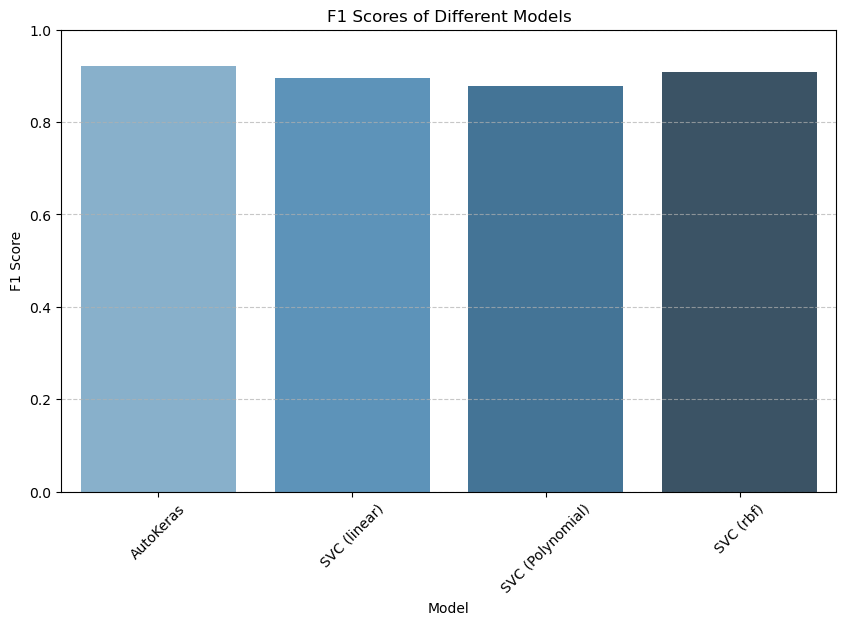

In [22]:
data = pd.DataFrame({'Model': ['AutoKeras', 'SVC (linear)', 'SVC (Polynomial)','SVC (rbf)'], 'F1 Score': [f1_autokeras, f1_linear_svc, f1_poly_svc,f1_rbf_svc]})

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust size if necessary
sns.barplot(x='Model', y='F1 Score', data=data, palette="Blues_d")
plt.title('F1 Scores of Different Models')
plt.ylim(0, 1)  # Set the y-axis limits to better visualize F1 scores
plt.ylabel('F1 Score')
plt.xlabel('Model')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.show()

We can notice that the `AutoKeras` model was the best performing, with the other `SVC` kernels having similar performance, subject to sampling error and average.

In [23]:
transcript_data.to_csv('data/transcript_data_v1.csv')

### Analysing the presence of common words in the transcript of both the channels

In [24]:
# Get feature names (tokens)
feature_names = linear_vectorizer.get_feature_names_out()

# Convert the coefficients to a dense NumPy array
coefficients_dense = classifier_linear.coef_[0].toarray()

# Convert the dense NumPy array to a normal list
coefficients = coefficients_dense.tolist()
feature_coeff_mapping = {}

for i in range(len(feature_names)):
    feature_coeff_mapping[feature_names[i]] = coefficients[0][i]

# Sort the features by their weight (coefficient)
sorted_features = sorted(feature_coeff_mapping.items(), key=lambda x: x[1], reverse=True)

# Extract top features for CNN-like and Fox-like
top_features_fox = sorted_features[:10]
top_features_cnn = sorted_features[-10:]

print(top_features_cnn)
print(top_features_fox)

[('quote', -2.344314835943469), ('yeah', -2.494612648344713), ('officials', -2.6251609334730914), ('te', -2.6527012101759646), ('reporter', -2.735708660755845), ('course', -2.8884966766909566), ('se', -3.0901699164419862), ('mean', -3.4339769674378195), ('st', -3.4659507713260855), ('th', -5.851882972293292)]
[('news', 2.826054506462467), ('contributor', 2.795222646715821), ('ballot', 2.76929343057819), ('dana', 2.7518052530775825), ('administration', 2.47066504822819), ('uh', 2.325997161955147), ('harris', 2.307569356183197), ('joins', 2.2988973655547733), ('um', 2.2255037124815056), ('laughter', 2.1794742944878274)]


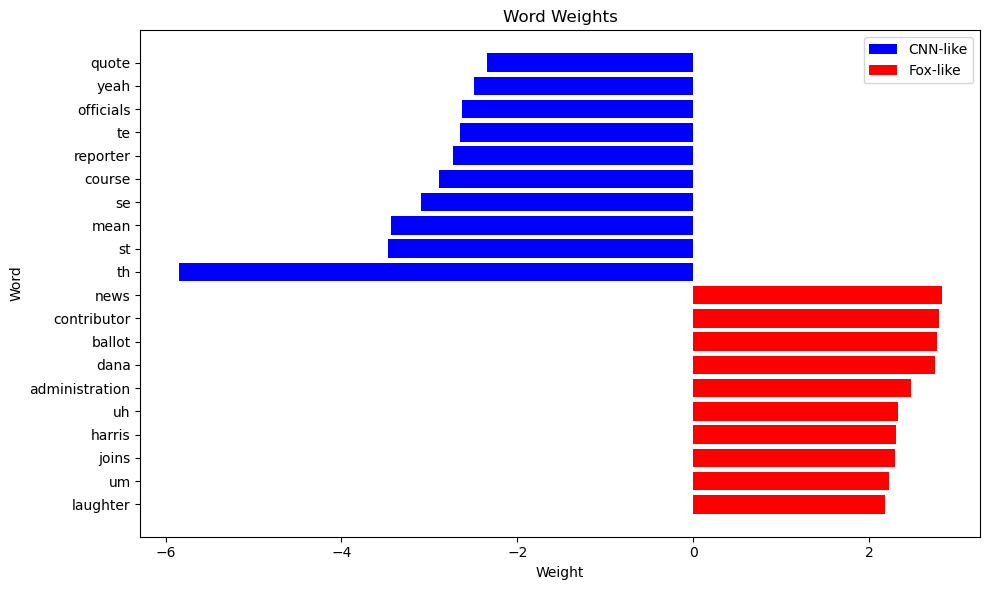

In [25]:
# Extracting words and weights
words1, weights1 = zip(*top_features_cnn)
words2, weights2 = zip(*top_features_fox)

# Plotting
plt.figure(figsize=(10, 6))

plt.barh(words1, weights1, color='blue', label='CNN-like')
plt.barh(words2, weights2, color='red', label='Fox-like')

plt.xlabel('Weight')
plt.ylabel('Word')
plt.title('Word Weights')
plt.legend()

plt.gca().invert_yaxis()  # Invert y-axis to have highest weights on top
plt.tight_layout()
plt.show()

### Conclusion - While we don't find any noticeable trends that differentiate the word clouds and looking at the frequency of words formed from the transcripts of the two news channels, the classifier giving us a high f-1 score tells us that when trained on a reasonably large dataset, the machine learning techniques can distinguish between the content of the two channels and I find this very interesting and just the start of this particular field of research of inducing polarity and a style of reporting across channels.